# How do health metrics affect math course performance in highschoolers?

## Introduction

#### Question

How do health metrics affect math course performance in highschoolers?

#### Dataset

This data focuses on the academic performance of secondary school students in two Portuguese schools. It includes various factors such as student grades, demographic information, social aspects, and school-related features. The data was collected through school reports and questionnaires. Two datasets are provided, specifically examining student performance in two different subjects: Mathematics and Portuguese.



In [8]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)

In [2]:
# Load the data from the web
set.seed(2000)
path <- 'https://raw.githubusercontent.com/JadenMajid/dsci-100-student-grades/main/student-mat.csv'

og_data <- read_csv2(file = path) |>
    mutate(Talc = Walc + Dalc)
    # mutate(Walc = as_factor(Walc)) |>
    # mutate(Dalc = as_factor(Dalc)) |>
    # mutate(Talc = as_factor(Talc))

# training data
split <- og_data |>
    initial_split(prop = 0.75, strata = G3)

data <- training(split)
test_data <- testing(split)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
sum_stats <- data |>
    group_by(sex) |>
    summarize(avg_G3 = mean(G3), avg_walc = mean(Walc), avg_dalc = mean(Dalc), 
              avg_health = mean(health), avg_studytime = mean(studytime), avg_absences = mean(absences))
sum_stats


sex,avg_G3,avg_walc,avg_dalc,avg_health,avg_studytime,avg_absences
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,9.90303,1.969697,1.260606,3.412121,2.278788,6.424242
M,10.94574,2.751938,1.767442,3.837209,1.767442,4.992248


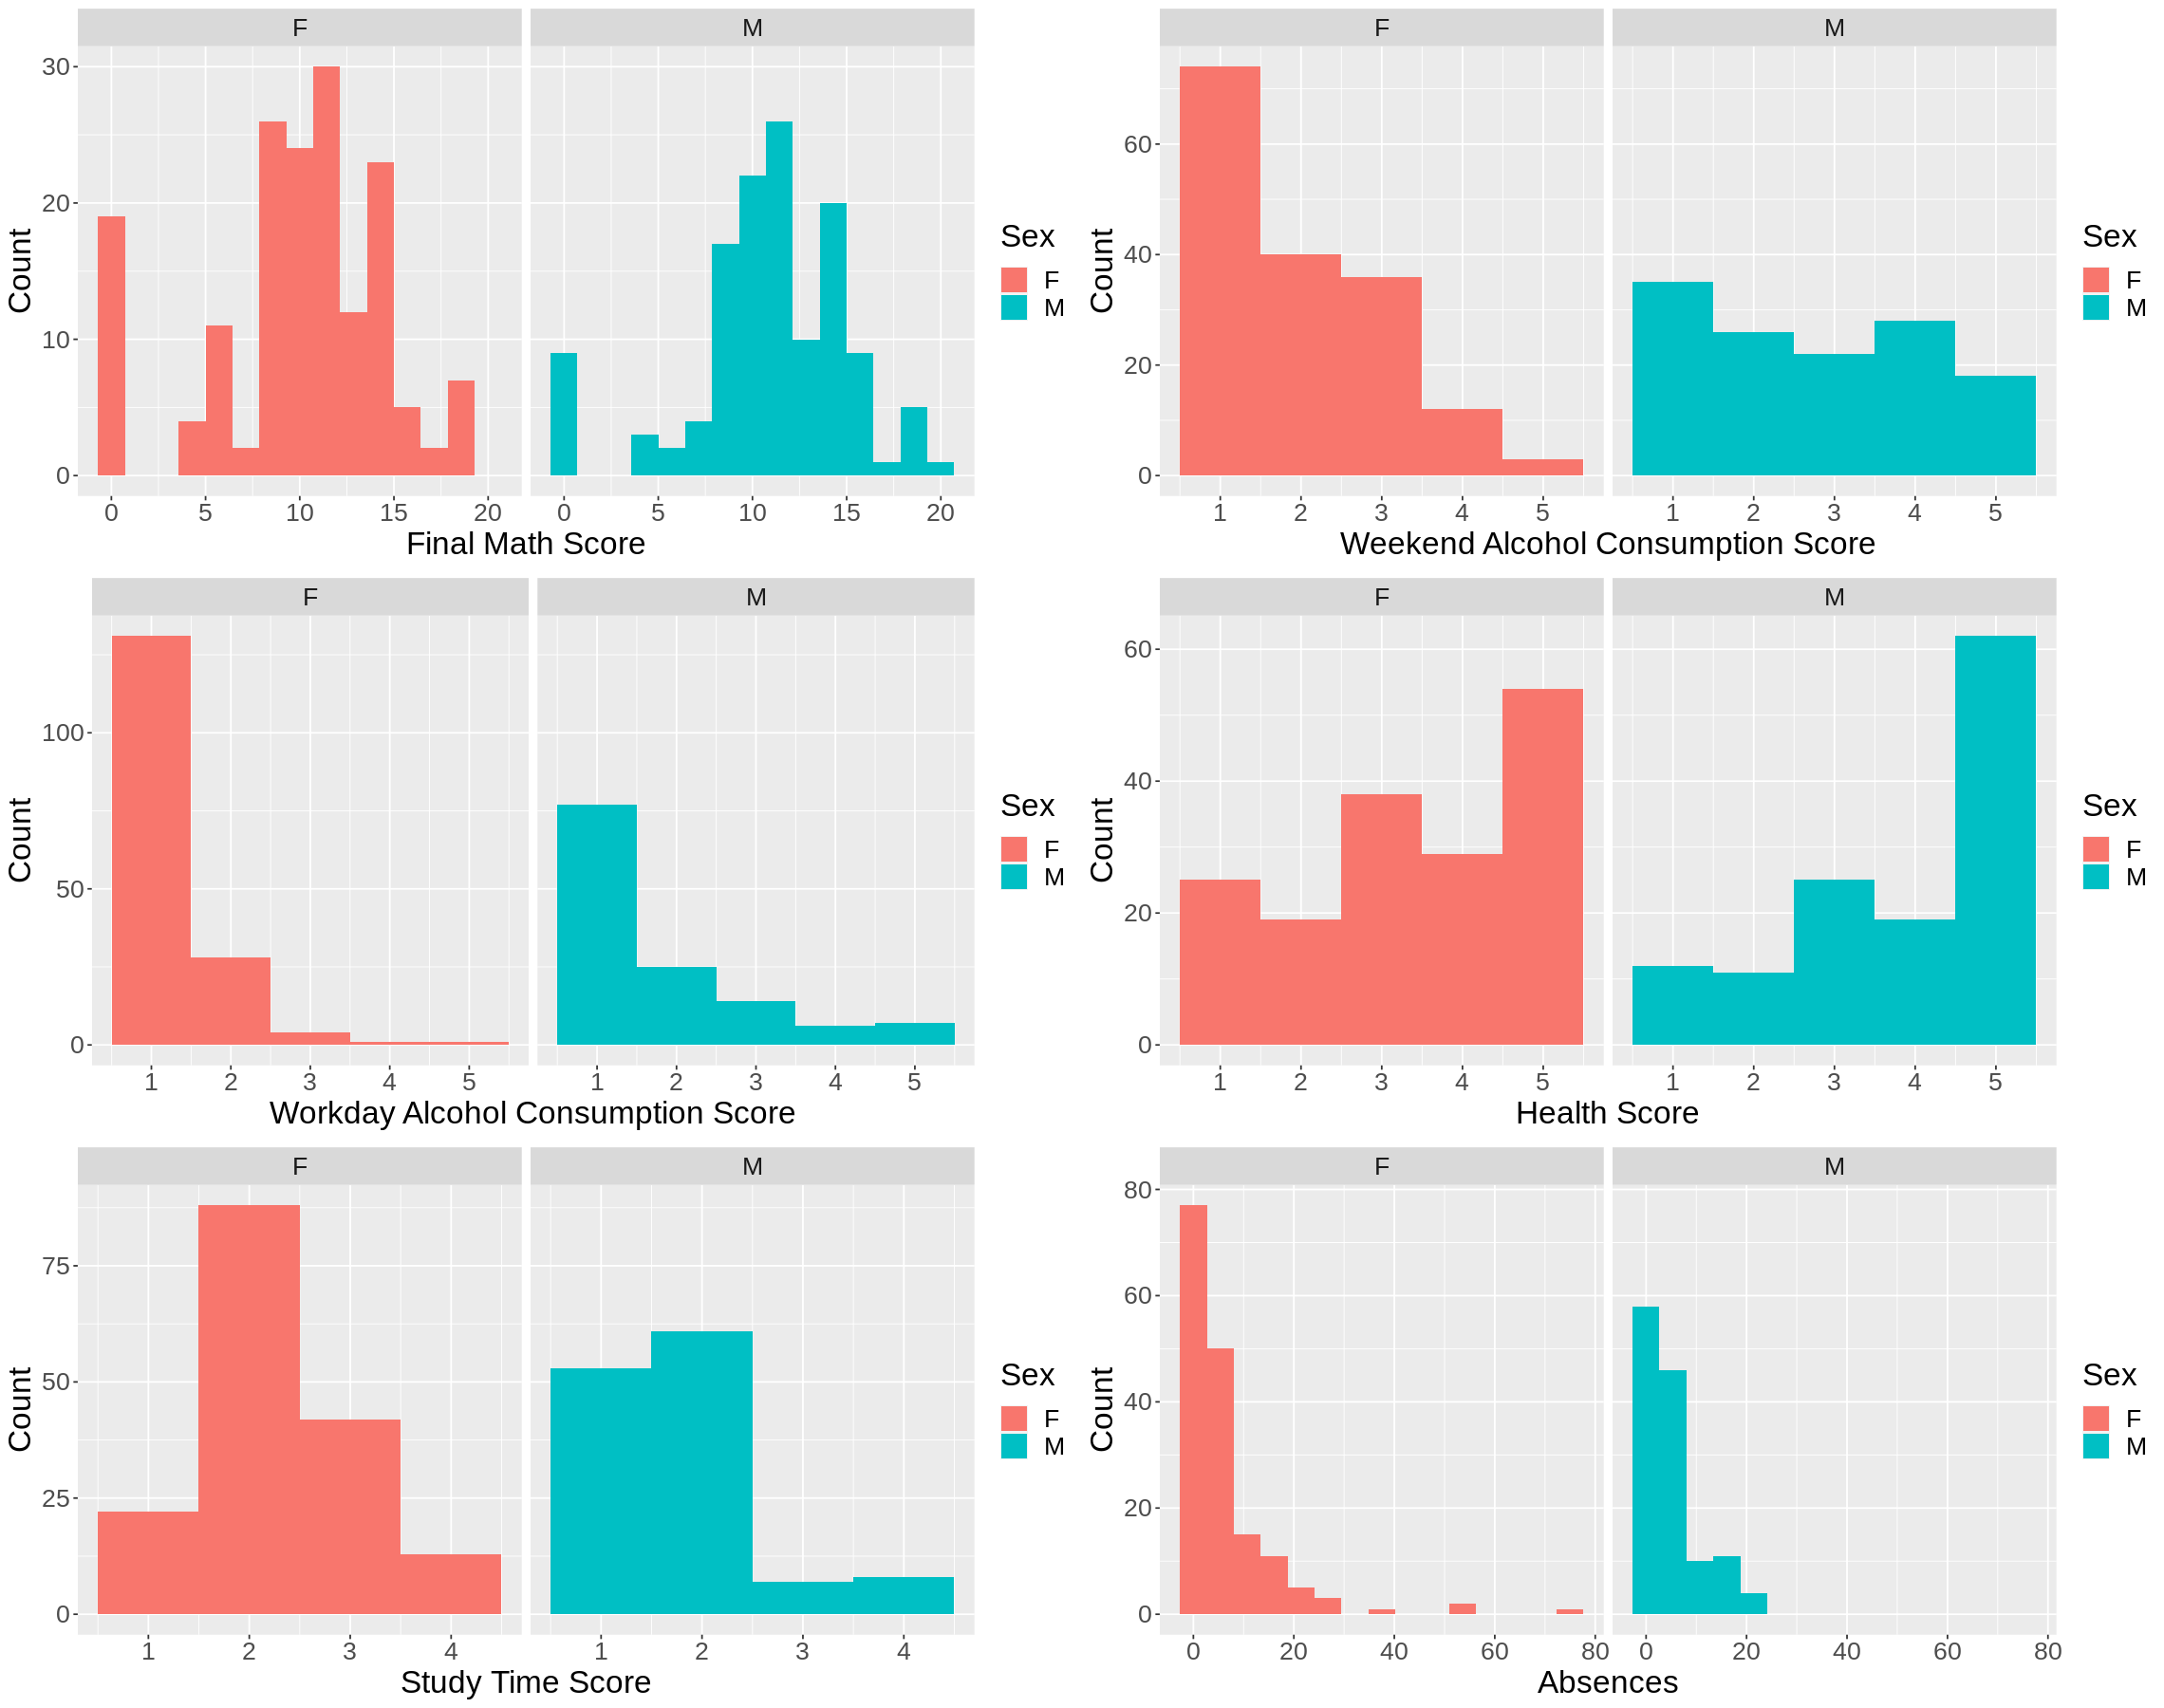

In [4]:
options(repr.plot.width = 19, repr.plot.height = 15)

G3_plot <- data |>
    ggplot() +
        geom_histogram(aes(x = G3, fill = as_factor(sex)), bins = 15) +
        facet_grid(cols = vars(sex)) +
        labs(x = "Final Math Score", y = "Count", fill = "Sex") +
        theme(text = element_text(size = 20))


walc_plot <- data |>
    ggplot() +
        geom_histogram(aes(x = Walc, fill = as_factor(sex)), bins = 5) +
        facet_grid(cols = vars(sex)) +
        labs(x = "Weekend Alcohol Consumption Score", y = "Count", fill = "Sex") +
        theme(text = element_text(size = 20))


dalc_plot <- data |>
    ggplot() +
        geom_histogram(aes(x = Dalc, fill = as_factor(sex)), bins = 5) +
        facet_grid(cols = vars(sex)) +
        labs(x = "Workday Alcohol Consumption Score", y = "Count", fill = "Sex") +
        theme(text = element_text(size = 20))


health_plot <- data |>
    ggplot() +
        geom_histogram(aes(x = health, fill = as_factor(sex)), bins = 5) +
        facet_grid(cols = vars(sex)) +
        labs(x = "Health Score", y = "Count", fill = "Sex") +
        theme(text = element_text(size = 20))


studytime_plot <- data |>
    ggplot() +
        geom_histogram(aes(x = studytime, fill = as_factor(sex)), bins = 4) +
        facet_grid(cols = vars(sex)) +
        labs(x = "Study Time Score", y = "Count", fill = "Sex") +
        theme(text = element_text(size = 20))


absences_plot <- data |>
    ggplot() +
        geom_histogram(aes(x = absences, fill = as_factor(sex)), bins = 15) +
        facet_grid(cols = vars(sex)) +
        labs(x = "Absences", y = "Count", fill = "Sex") +
        theme(text = element_text(size = 20))


top_row <- plot_grid(G3_plot, walc_plot)
middle_row <- plot_grid(dalc_plot, health_plot)
bottom_row <- plot_grid(studytime_plot, absences_plot)
summary_plot <- plot_grid(top_row, middle_row, bottom_row, ncol = 1)
summary_plot

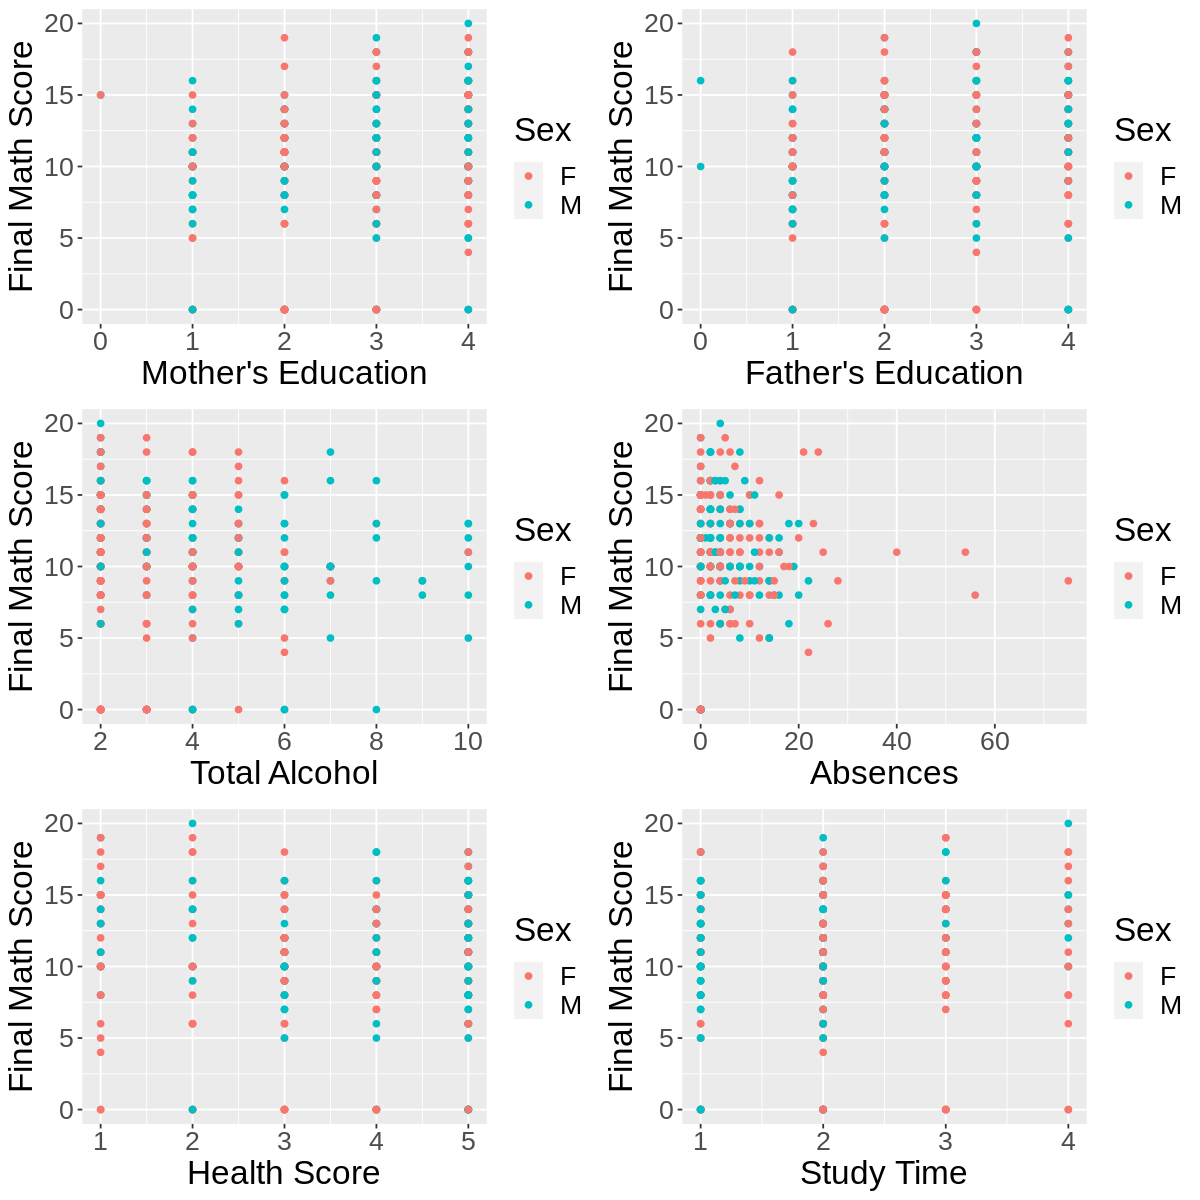

In [5]:
options(repr.plot.width = 10, repr.plot.height = 10)

medu_vs_G3 <- data |>
    ggplot() +
        geom_point(aes(x = Medu, y = G3, color = sex)) +
        labs(x = "Mother's Education", y = "Final Math Score", color = "Sex") +
        theme(text = element_text(size = 20))


fedu_vs_G3 <- data |>
    ggplot() +
        geom_point(aes(x = Fedu, y = G3, color = sex)) +
        labs(x = "Father's Education", y = "Final Math Score", color = "Sex") +
        theme(text = element_text(size = 20))


talc_vs_G3 <- data |>
    ggplot() +
        geom_point(aes(x = Talc, y = G3, color = sex)) +
        labs(x = "Total Alcohol", y = "Final Math Score", color = "Sex") +
        theme(text = element_text(size = 20))


absences_vs_G3 <- data |>
    ggplot() +
        geom_point(aes(x = absences, y = G3, color = sex)) +
        labs(x = "Absences", y = "Final Math Score", color = "Sex") +
        theme(text = element_text(size = 20))


health_vs_G3 <- data |>
    ggplot() +
        geom_point(aes(x = health, y = G3, color = sex)) +
        labs(x = "Health Score", y = "Final Math Score", color = "Sex") +
        theme(text = element_text(size = 20))


study_vs_G3 <- data |>
    ggplot() +
        geom_point(aes(x = studytime, y = G3, color = sex)) +
        labs(x = "Study Time", y = "Final Math Score", color = "Sex") +
        theme(text = element_text(size = 20))


top_row_2 <- plot_grid(medu_vs_G3, fedu_vs_G3)
middle_row_2 <- plot_grid(talc_vs_G3, absences_vs_G3)
bottom_row_2 <- plot_grid(health_vs_G3, study_vs_G3)
summary_plot_2 <- plot_grid(top_row_2, middle_row_2, bottom_row_2, ncol = 1)
summary_plot_2

# Methods

Data analysis will be conducted by using the following variables: health, sex, weekend/workday alcohol consumption, study time, and absences. A classification model will be trained using a subset of this dataset to predict G3 Mathematics scores. Before training, the data will be properly normalized. This model will be tested on the testing subset of the dataset. To choose the optimal number of nearest neighbours to consider, the training dataset will be further split up to validate out choice of number of neighbours. A classification model is chosen since the reported G3 scores are natural numberse from 0 to 20. 

The variables that appear to show the most correlation with the final math scores will be used in the model, and can reference the above plots for those variables.

#### Expectations

It is expected to find Mathematic scores and these "health" variables will be inversely correlated. As health declines, one would expect a student's scores to decline as well. This may occur with increasing weekend and workday alcohol consumption, lower health scores, increased absences, and lower study time. If such a relationship is seen in the analysis, perhaps these school districts will place more emphasis on student livelihood and wellbeing as a way to improve their academic performance. This may lead to other interesting investigations, such as looking into relationships between academic performance and a parent's marital status, or other external factors that may affect a student's schooling.

# Alternative Wine Dataset
This dataset has more continuous variables, which may make it easier to create a regression/classification model to. There are also stronger correlations between the variables.

# Predicting Wine Cultivator from Chemical Characteristics

This dataset is a result of chemical analysis done on different wines from the same region in Italy. All wines originate from 3 different cultivators. The dataset contains information about the quantity of 13 different constituents found in these three types of wine. This model will attempt to use these measurements to predict the wine type. 

In [26]:
# read data
wine_path <- 'https://raw.githubusercontent.com/adrianwu2000/toy_ds_project/main/wine.data'

wine_data <- read_delim(file = wine_path, delim = ",", col_names = FALSE) |>
    mutate(X1 = as_factor(X1)) |>
    select(-X14)
colnames(wine_data) <- c('alcohol', 'malic_acid', 'ash', 'alcalinity', 'magnesium', 'total_phenols',
                         'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity',
                         'hue', 'OD280_or_OD315_of_diluted wines', 'proline')
# split data
split <- wine_data |>
    initial_split(prop = 0.75, strata = alcohol)

wine_training_data <- training(split)
wine_test_data <- testing(split)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Preliminary Exploratory Data Analysis

The mean, max, and minimum of each variable is shown below. The number of wines from each region in Italy is also shown.

In [30]:
mean_stats <- wine_training_data |>
    group_by(alcohol) |>
    summarize(across(malic_acid:proline, mean))
mean_stats

alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_or_OD315_of_diluted wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.76841,1.902273,2.467273,16.99545,106.81818,2.864318,3.0168182,0.2929545,1.972955,5.645682,1.0709091,3.177500
2,12.29057,1.935660,2.291132,20.40000,95.32075,2.277547,2.1130189,0.3647170,1.627547,3.076792,1.0653962,2.769057
3,13.17111,3.398333,2.458333,21.52778,100.13889,1.717778,0.8241667,0.4402778,1.176111,7.573333,0.6813889,1.698889


In [31]:
max_stats <- wine_training_data |>
    group_by(alcohol) |>
    summarize(across(malic_acid:proline, max))
max_stats

alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_or_OD315_of_diluted wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.83,3.80,3.22,25.0,132,3.88,3.74,0.50,2.96,8.9,1.25,4.00
2,13.86,5.80,3.23,30.0,162,3.50,5.08,0.63,3.28,6.0,1.71,3.69
3,14.34,5.65,2.86,25.5,123,2.80,1.57,0.63,2.70,13.0,0.96,2.47


In [32]:
min_stats <- wine_training_data |>
    group_by(alcohol) |>
    summarize(across(malic_acid:proline, min))
min_stats

alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_or_OD315_of_diluted wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.85,1.35,2.04,11.2,89,2.40,2.19,0.17,1.25,3.58,0.89,2.57
2,11.03,0.89,1.36,10.6,70,1.10,0.57,0.13,0.41,1.74,0.69,1.67
3,12.20,1.35,2.15,18.0,86,1.15,0.47,0.17,0.64,3.85,0.48,1.27


In [34]:
# wines from each region
counts <- wine_training_data |>
    group_by(alcohol) |>
    summarize(count = n())
counts

alcohol,count
<fct>,<int>
1,44
2,53
3,36


### Visualization of the Data
Below is a plot of all the variables in combination with each other. All combinations are shown, and data is coloured by the region. By looking at this overview of data, certain pairs of variables can be identified to be used in the model. These pairs should show a clear relationship between the variables and the type of wine. One such example is the plot of Malic acid versus Proline (bottom left). The wines from each region are seperated into relatively clear sections of the plot, signifying these variables may be a good fit for training the model. An example of a bad pair to use may be Alcalinity versus Magnesium. The wines from all the regions are closely spread together, and it may be hard for our model to distinguish between them. Scaling and centering have not been performed yet, but that may change how some of these plots look. 

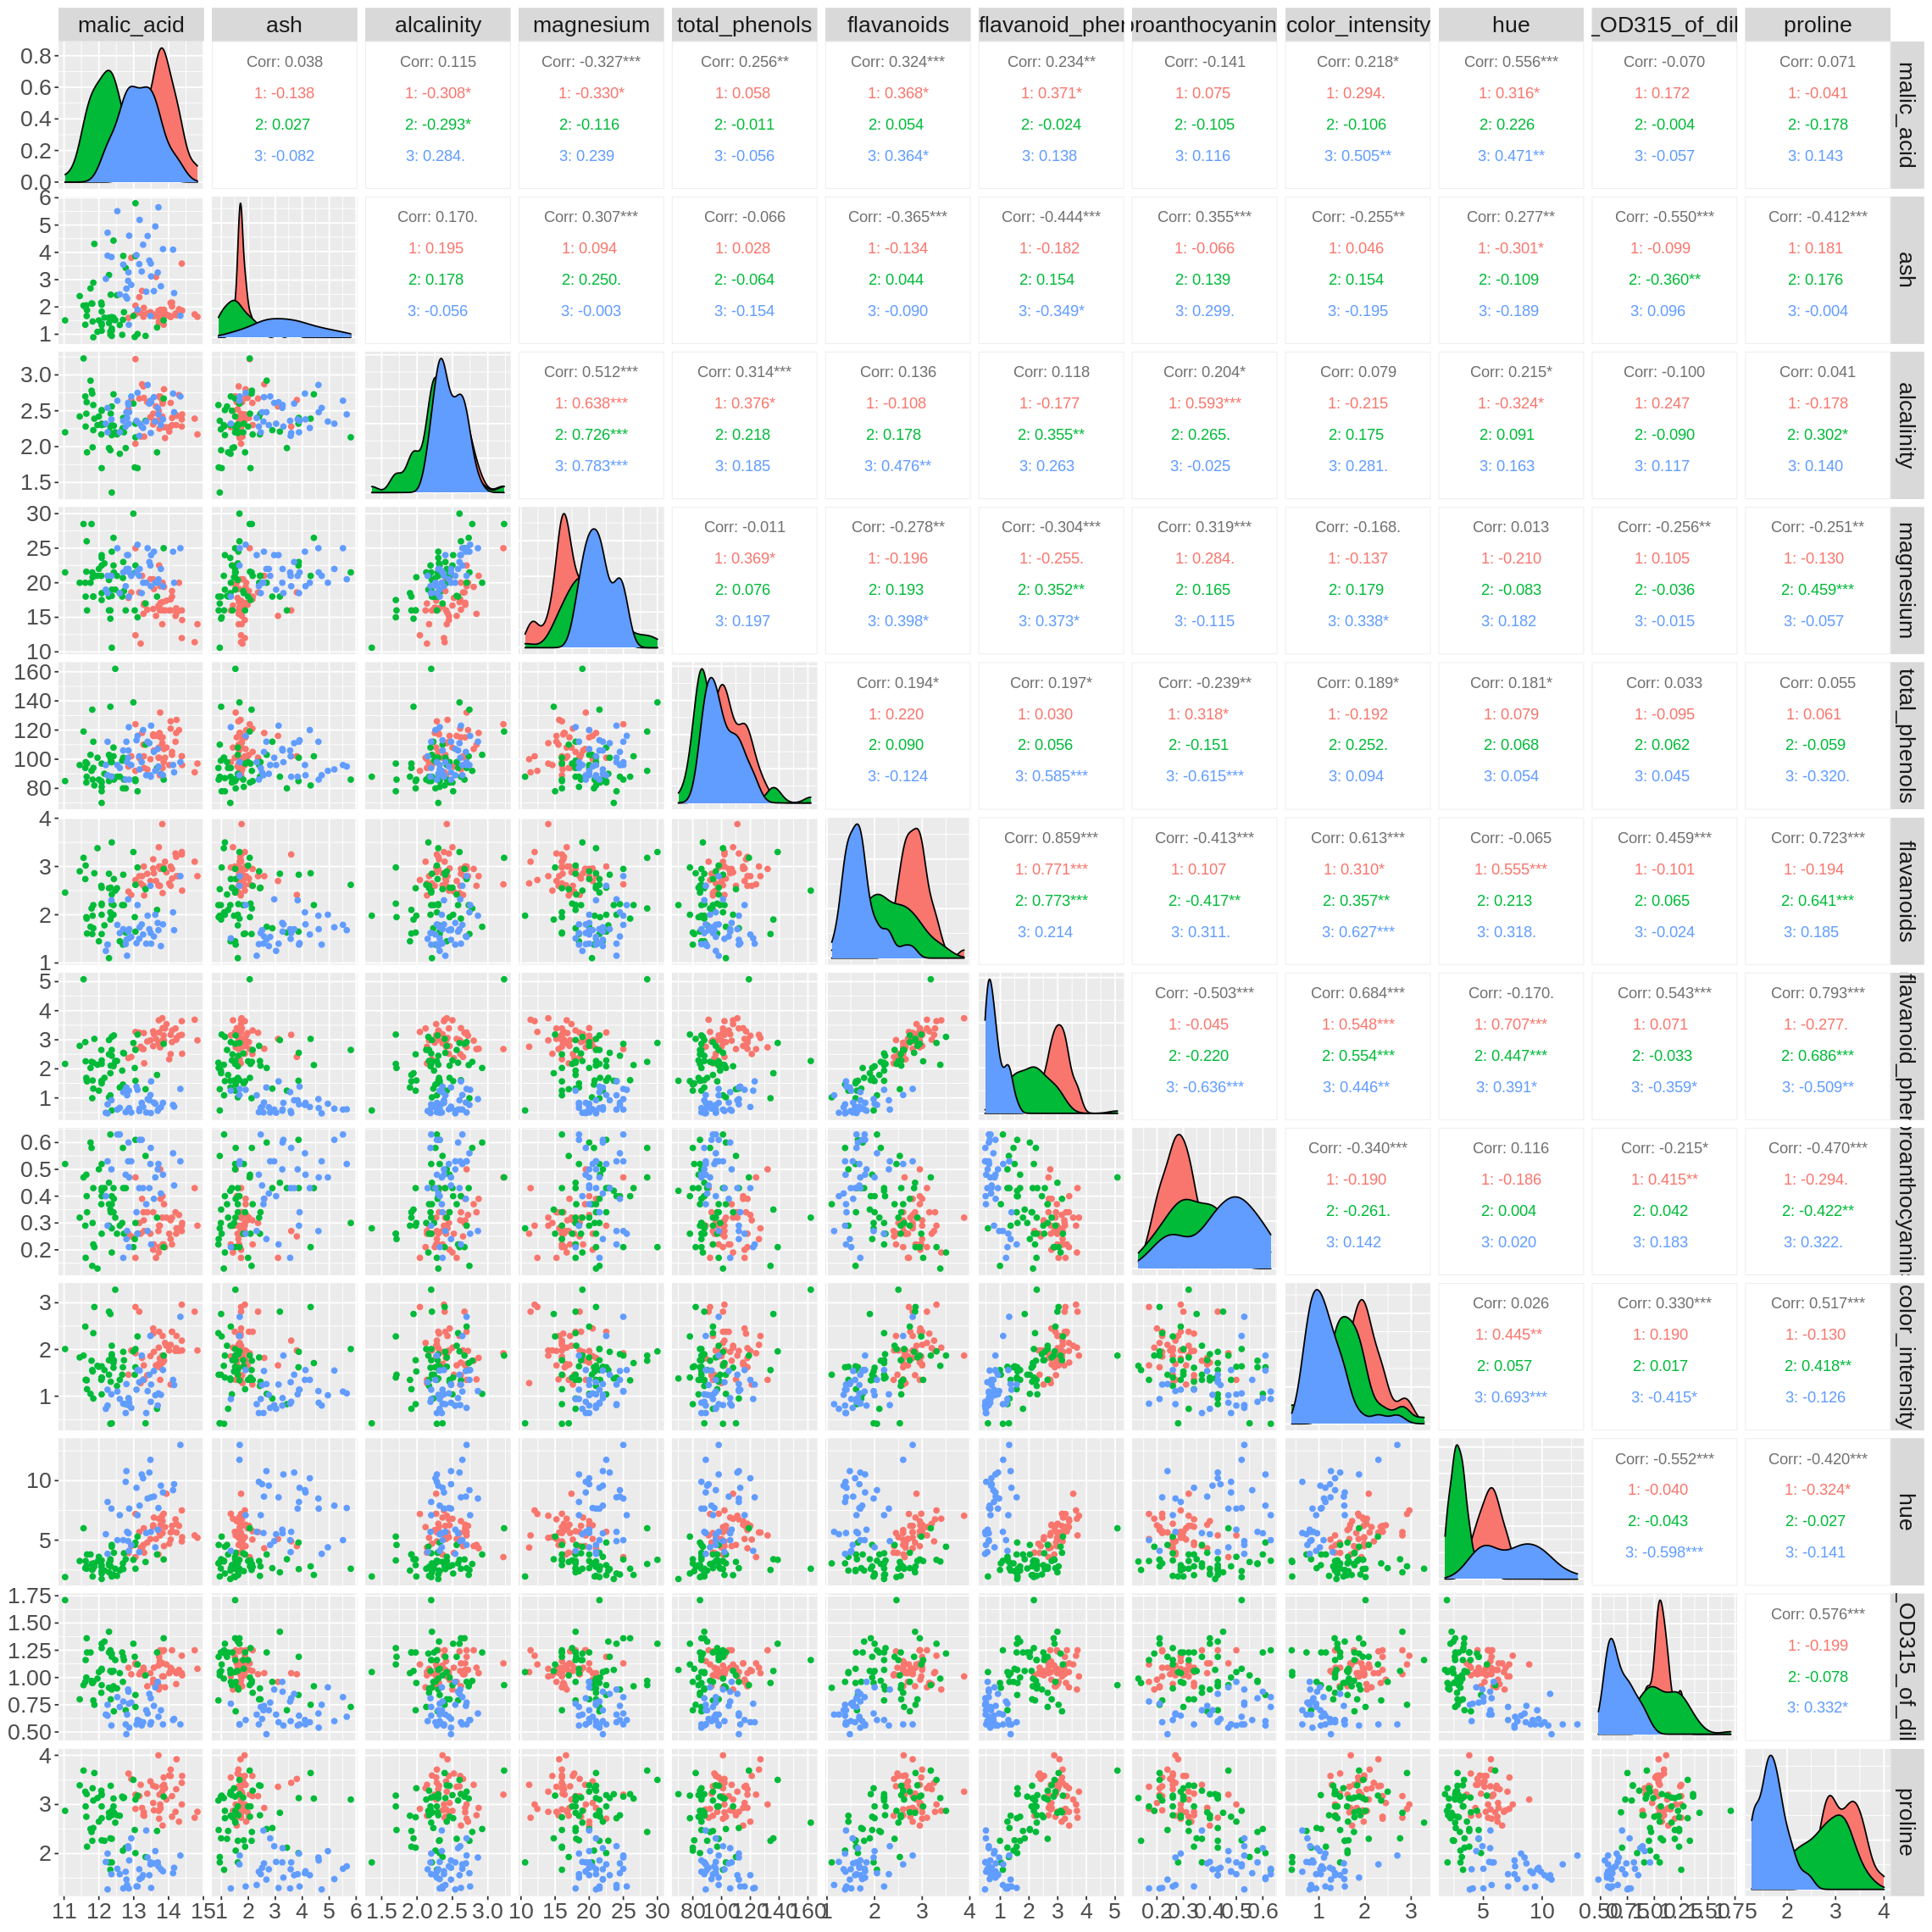

In [28]:
options(repr.plot.width = 19, repr.plot.height = 19)
wine_training_data |> 
  ggpairs(columns = 2:13, ggplot2::aes(colour = alcohol))+
    theme(text = element_text(size = 20))#, upper = list(continuous = "density", combo = "box_no_facet")

### Methods
For this model, a classification model will be used, as the cultivator from which the wine originated from is what is trying to be predicted. There are only 3 options for the origin, and as such, a classification model is appropriate. Though there are a lot of variables that could be used, only a few will be chosen, as not all are useful for prediction. They will be chosen by looking at the plot above and picking the variables that show the strongest relationship with the alcohol cultivator. As mentioned before, these are the plots with the most distinct separation between the three types. From the graph above, the plots that visually appear to be the "best" are:

Malic Acid vs. Proline

Nonflavanoid Phenols vs. Hue

The choice is subjective, and other individuals may make different choices. Their plots are show below. Nonetheless, the model will use these 2 variables to predict the alcohol origin. They will be:

(pick here)

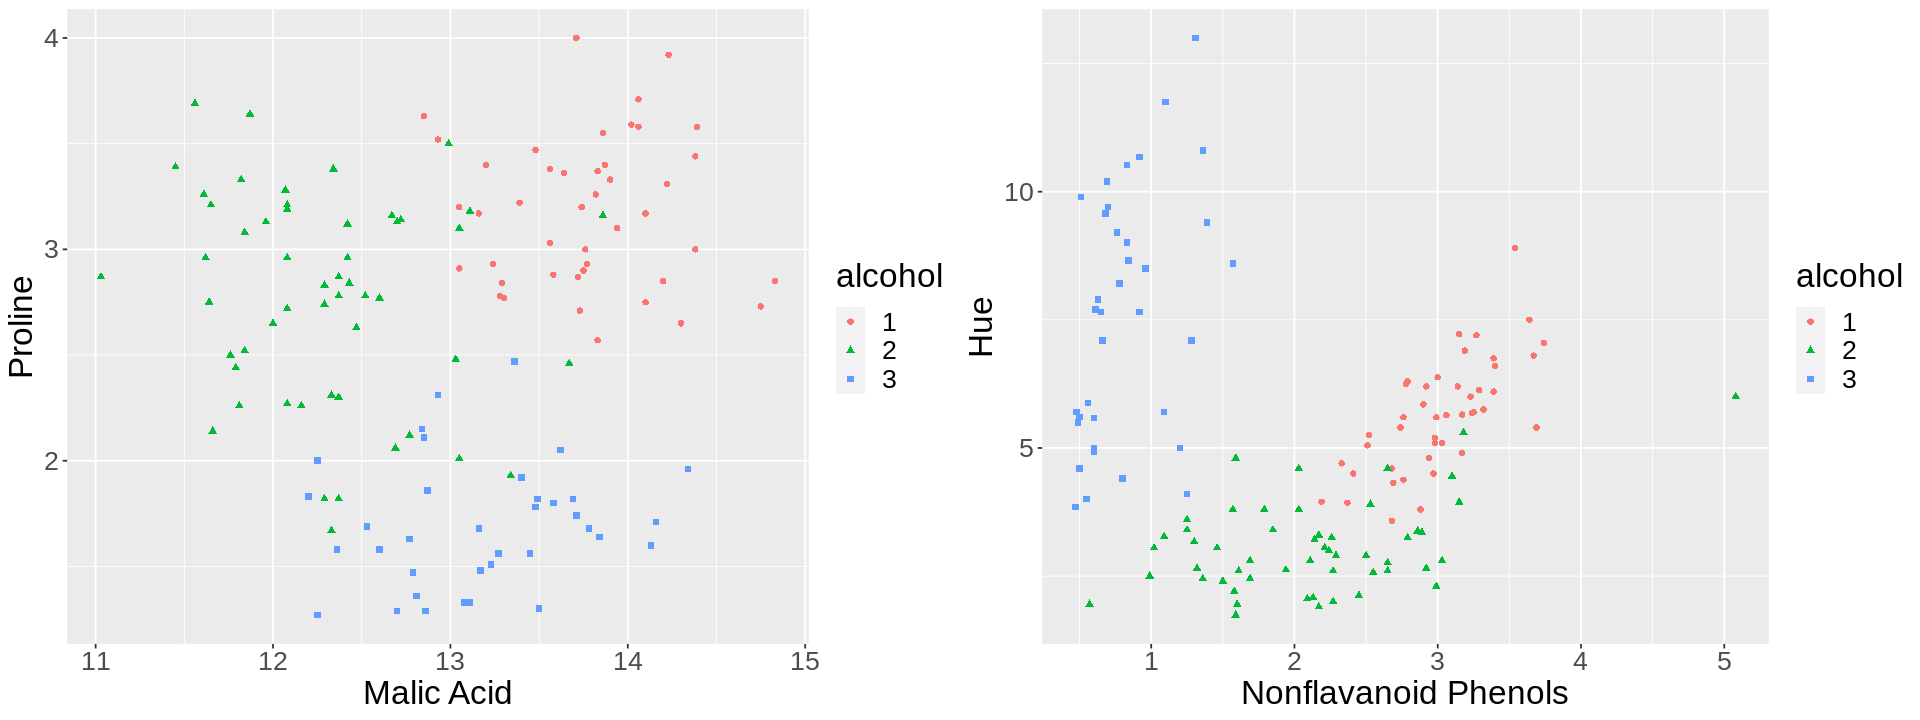

In [48]:
options(repr.plot.width = 16, repr.plot.height = 6)
malic_acid_proline_plot <- wine_training_data |>
    ggplot(aes(x = malic_acid, y = proline, color = alcohol, shape = alcohol)) +
    geom_point() +
    labs(x = "Malic Acid", y = "Proline") + 
    theme(text = element_text(size = 20))


nonflavanoid_hue_plot <- wine_training_data |>
    ggplot(aes(x = nonflavanoid_phenols, y = hue, color = alcohol, shape = alcohol)) +
    geom_point() +
    labs(x = "Nonflavanoid Phenols", y = "Hue") + 
    theme(text = element_text(size = 20))


plot_of_options <- plot_grid(malic_acid_proline_plot, nonflavanoid_hue_plot, ncol = 2)
plot_of_options

### Visualization
One way to visualize the results will be with a scatter plot. Since a smaller number of input variables is chosen, the results can be easily visualized on a 2D plot. This allows the testing points to be highlighted in relation to the training points, allowing for readers to visually see the "goodness" of the model. Such example graphs have been given in the textbook already, so this will be easily achievable. 

### Expectations

Just by looking at the data plotted, there are distinct areas on the plot where each wine group exists. This is a good indicator that the model should be able to predict where the wine originates from based on these variables. However, there is some overlapping of the points, which can make it difficult for the model to accurately classify edge cases. Nevertheless, it is expected that this choice of variables will be a good predictor of the data's wine origin. 

Such findings may allow for wineries to selectively choose wines from certian regions based on their chemical composition. Wines from certain regions, such as Napa Valley, or types of grapes, such as Cabernet Sauvignon, may have a distinct chemical composition that makes their flavour so popular and desireable. The findings of this model may allow for wineries to alter the chemical composition of cheaper wines to match those from more expensive regions. Perhaps some chemical constituents are more desireable for some individuals, maybe for health benefits, and this model would be able to identify regions where those chemcial constituents are more abundant.

This lead to the natural question of where these chemicals come from, and what makes the wines from these regions have varying levels of these chemicals - a topic for future investigation.